<h2 style="color:darkred;font-size:30px">Projet 5 : Segmentez des clients d'un site e-commerce</h2>

<img src="images\olist.png" style="width: 250px;"/>

<h2 style="color:darkred;font-size:30px">Notebook 1 : Nettoyage des données</h2>

---
---
---

<h2 style="color:darkred;font-size:20px">Projet</h2>

Vous êtes consultant pour Olist, une solution de vente sur les marketplaces en ligne.

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez **fournir à l’équipe marketing une description actionable** de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une **proposition de contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps.

<h2 style="color:darkred;font-size:20px">Dataset resource</h2>

Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017. Nous avons à notre disposition le jeu de données sur le lien :

https://www.kaggle.com/olistbr/brazilian-ecommerce


<h2 style="color:darkred;font-size:20px">L'objectif</h2>

    - Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.
    - Pour des raisons de confidentialité, Olist ne fournit pas beaucoup de données, à vous de fouiller dans celles dont vous disposez et de créer les meilleures features pour les exploiter.
    
Enfin, votre client, Olist, a spécifié sa demande ainsi :

    - La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
    - Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
    - Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist. 
    
https://www.python.org/dev/peps/pep-0008/

<h2 style="color:darkred;font-size:20px">Sommaire</h2>
    
    Notebook 1 ____ Nettoyage et Analyse Exploratoire ________________________________________
    1. Téléchargement des 8 jeux des données
    2. Concaténation des datasets
    3. Analyse Exploratoire - I
    4. Feature Engineering
        4.1 Caractéristiques du client
        4.2 Caractéristiques de la commande
        4.3 Nouveaux features definis à partir de variables categorielles
    5. Analyse Exploratoire - II
    
    Notebook 2 ____ Modélisation (Machine Learning) __________________________________________


# 1. Téléchargement des 8 jeux des données

#### Cette partie concerne de combiner les datasets sur les colonnes communes.

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# la librarie des fonctions crée pour le projet olist

from olist_functions import *

# initiate notebook for offline plot
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objects as go
# Reference : https://plotly.com/python/pie-charts/

init_notebook_mode(connected=True)  # initiate notebook for offline plot

In [2]:
# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {
    'family': 'Arial',
    'color': 'darkred',
    'weight': 'bold',
    'size': 20,
}

In [3]:
# lire le fichier csv pour les consommateurs
customers_dataset = pd.read_csv('data/olist_customers_dataset.csv')
print('Le jeu des données customers_dataset compte {} colonnes et {} lignes.'.
      format(customers_dataset.shape[1], customers_dataset.shape[0]))

# lire le fichier csv pour la geolocation
geolocation_dataset = pd.read_csv('data/olist_geolocation_dataset.csv')
print(
    'Le jeu des données geolocation_dataset compte {} colonnes et {} lignes.'.
    format(geolocation_dataset.shape[1], geolocation_dataset.shape[0]))

# lire le fichier csv pour les items
order_items_dataset = pd.read_csv('data/olist_order_items_dataset.csv')
print(
    'Le jeu des données order_items_dataset compte {} colonnes et {} lignes.'.
    format(order_items_dataset.shape[1], order_items_dataset.shape[0]))

# lire le fichier csv pour les payments
order_payments_dataset = pd.read_csv('data/olist_order_payments_dataset.csv')
print(
    'Le jeu des données order_payments_dataset compte {} colonnes et {} lignes.'
    .format(order_payments_dataset.shape[1], order_payments_dataset.shape[0]))

# lire le fichier csv pour les revoirs
order_reviews_dataset = pd.read_csv('data/olist_order_reviews_dataset.csv')
print(
    'Le jeu des données order_reviews_dataset compte {} colonnes et {} lignes.'
    .format(order_reviews_dataset.shape[1], order_reviews_dataset.shape[0]))

# lire le fichier csv pour les commandes
orders_dataset = pd.read_csv('data/olist_orders_dataset.csv')
print('Le jeu des données orders_dataset compte {} colonnes et {} lignes.'.
      format(orders_dataset.shape[1], orders_dataset.shape[0]))

# lire le fichier csv pour les produits
products_dataset = pd.read_csv('data/olist_products_dataset.csv')
print('Le jeu des données products_dataset compte {} colonnes et {} lignes.'.
      format(products_dataset.shape[1], products_dataset.shape[0]))
# lire le fichier csv pour les vendeurs
sellers_dataset = pd.read_csv('data/olist_sellers_dataset.csv')
print('Le jeu des données sellers_dataset compte {} colonnes et {} lignes.'.
      format(sellers_dataset.shape[1], sellers_dataset.shape[0]))

# lire le fichier csv pour la traduction
product_category_name_translation = pd.read_csv(
    'data/product_category_name_translation.csv')
print(
    'Le jeu des données product_category_name_translation compte {} colonnes et {} lignes.'
    .format(product_category_name_translation.shape[1],
            product_category_name_translation.shape[0]))

Le jeu des données customers_dataset compte 5 colonnes et 99441 lignes.
Le jeu des données geolocation_dataset compte 5 colonnes et 1000163 lignes.
Le jeu des données order_items_dataset compte 7 colonnes et 112650 lignes.
Le jeu des données order_payments_dataset compte 5 colonnes et 103886 lignes.
Le jeu des données order_reviews_dataset compte 7 colonnes et 100000 lignes.
Le jeu des données orders_dataset compte 8 colonnes et 99441 lignes.
Le jeu des données products_dataset compte 9 colonnes et 32951 lignes.
Le jeu des données sellers_dataset compte 4 colonnes et 3095 lignes.
Le jeu des données product_category_name_translation compte 2 colonnes et 71 lignes.


#### La liason suivante entre les datasets se trouve sur Kaggle

<img src="images\olist-data.png" style="width: 800px;"/>

# 2. Concaténation des datasets

#### Nous allons combiner les datasets. L'explication de chaques variables se trouve ci-dessous. Tout d'abord, nous faisons un tableau des valeurs manquantes

In [4]:
# Nous faisons une liste de toutes les variables avec les valeurs manquantes

pd.concat([
    manquant(customers_dataset),
    manquant(orders_dataset),
    manquant(order_items_dataset),
    manquant(order_payments_dataset),
    manquant(products_dataset),
    manquant(order_reviews_dataset),
    manquant(sellers_dataset),
    manquant(geolocation_dataset),
    manquant(product_category_name_translation)
],
    axis=0,
    ignore_index=True)

column_name  nb_manquant  nb_present  \
0                     customer_id            0       99441   
1              customer_unique_id            0       99441   
2        customer_zip_code_prefix            0       99441   
3                   customer_city            0       99441   
4                  customer_state            0       99441   
5   order_delivered_customer_date         2965       96476   
6    order_delivered_carrier_date         1783       97658   
7               order_approved_at          160       99281   
8                        order_id            0       99441   
9                     customer_id            0       99441   
10                   order_status            0       99441   
11       order_purchase_timestamp            0       99441   
12  order_estimated_delivery_date            0       99441   
13                       order_id            0      112650   
14                  order_item_id            0      112650   
15                     product_id            0      112650   
16                      seller_id            0      112650   
17            shipping_limit_date            0      112650   
18                          price            0      112650   
19                  freight_value            0      112650   
20                       order_id            0      103886   
21             payment_sequential            0      103886   
22                   payment_type            0      103886   
23           payment_installments            0      103886   
24                  payment_value            0      103886   
25          product_category_name          610       32341   
26            product_name_lenght          610       32341   
27     product_description_lenght          610       32341   
28             product_photos_qty          610       32341   
29               product_weight_g            2       32949   
30              product_length_cm            2       32949   
31              product_height_cm            2       32949   
32               product_width_cm            2       32949   
33                     product_id            0       32951   
34           review_comment_title        88285       11715   
35         review_comment_message        58247       41753   
36                      review_id            0      100000   
37                       order_id            0      100000   
38                   review_score            0      100000   
39           review_creation_date            0      100000   
40        review_answer_timestamp            0      100000   
41                      seller_id            0        3095   
42         seller_zip_code_prefix            0        3095   
43                    seller_city            0        3095   
44                   seller_state            0        3095   
45    geolocation_zip_code_prefix            0     1000163   
46                geolocation_lat            0     1000163   
47                geolocation_lng            0     1000163   
48               geolocation_city            0     1000163   
49              geolocation_state            0     1000163   
50          product_category_name            0          71   
51  product_category_name_english            0          71   

    taux de remplissage datatype  
0                100.00   object  
1                100.00   object  
2                100.00    int64  
3                100.00   object  
4                100.00   object  
5                 97.02   object  
6                 98.21   object  
7                 99.84   object  
8                100.00   object  
9                100.00   object  
10               100.00   object  
11               100.00   object  
12               100.00   object  
13               100.00   object  
14               100.00    int64  
15               100.00   object  
16               100.00   object  
17               100.00   object  
18               100.00  float64  
19               100.00  float64  


## customers_dataset

    + customer_id : key to the orders dataset. Each order has a unique customer_id.
    - customer_unique_id : unique identifier of a customer.
    - customer_zip_code_prefix : first five digits of customer zip code
    - customer_city : customer city name
    - customer_state : customer state

## geolocation_dataset

    - geolocation_zip_code_prefix : first 5 digits of zip code
    - geolocation_lat : latitude
    - geolocation_lng : longitude

In [5]:
# combine customers_dataset et geolocation_dataset

location = geolocation_dataset[[
    'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'
]].groupby('geolocation_zip_code_prefix').mean().reset_index()

cols = [
    'customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
    'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng'
]

df0 = pd.merge(left=customers_dataset,
               right=location,
               left_on='customer_zip_code_prefix',
               right_on='geolocation_zip_code_prefix',
               how='left')[cols]
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   customer_zip_code_prefix  99441 non-null  int64  
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
 5   geolocation_lat           99163 non-null  float64
 6   geolocation_lng           99163 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ MB


## orders_dataset

    - order_id : unique identifier of the order.
    + customer_id : key to the customer dataset. Each order has a unique customer_id.
    - order_status : Reference to the order status (delivered, shipped, etc).
    - order_purchase_timestamp : Shows the purchase timestamp.
    - order_approved_at : Shows the payment approval timestamp.
    - order_delivered_carrier_date : Shows the order posting timestamp. When it was handled to the logistic partner.
    - order_delivered_customer_date : Shows the actual order delivery date to the customer.
    - order_estimated_delivery_date : Shows the estimated delivery date that was informed to customer at the purchase moment.

In [6]:
# combine df0 et orders_dataset

df1 = pd.merge(df0, orders_dataset, how='left', on='customer_id')

not_used = [
    'customer_zip_code_prefix', 'order_approved_at',
    'order_delivered_carrier_date'
]

## order_items_dataset

    + order_id
    - order_item_id : sequential number identifying number of items included in the same order.
    - product_id : product unique identifier
    - seller_id : seller unique identifier
    - shipping_limit_date : Shows the seller shipping limit date for handling the order over to the logistic partner.
    - price : item price
    - freight_value : item freight value item (if an order has more than one item the freight value is splitted between items)

In [7]:
df2 = pd.merge(df1, order_items_dataset, how='left', on='order_id')

not_used.extend(['shipping_limit_date', 'order_item_id'])

## order_payments_dataset

    - order_id
    - payment_sequential : a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
    - payment_type : method of payment chosen by the customer.
    - payment_installments : number of installments chosen by the customer.
    - payment_value : transaction value.

In [8]:
df3 = pd.merge(df2, order_payments_dataset, how='left', on='order_id')

# not_used.extend(['shipping_limit_date', 'order_item_id'])

## products_dataset
    
    + product_id
    - product_category_name : root category of product, in Portuguese.
    - product_name_lenght : number of characters extracted from the product name.
    - product_description_lenght : number of characters extracted from the product description.
    - product_photos_qty : number of product published photos
    - product_weight_g : product weight measured in grams.
    - product_length_cm 
    - product_height_cm
    - product_width_cm

In [9]:
products_dataset = pd.merge(left=products_dataset,
                            right=product_category_name_translation,
                            on='product_category_name',
                            how='left')

In [10]:
products_dataset.head(5)

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

In [11]:
df4 = pd.merge(df3, products_dataset, how='left', on='product_id')

not_used.extend([
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty'
])

## order_reviews_dataset

    - review_id : unique review identifier
    + order_id
    - review_score : Note ranging from 1 to 5 given by the customer on a satisfaction survey.
    - review_comment_title : Comment title from the review left by the customer, in Portuguese.
    - review_comment_message : Comment message from the review left by the customer, in Portuguese.
    - review_creation_date : Shows the date in which the satisfaction survey was sent to the customer.
    - review_answer_timestamp : Shows satisfaction survey answer timestamp.

In [12]:
df5 = pd.merge(df4, order_reviews_dataset, how='left', on='order_id')

not_used.extend([
    'review_id', 'review_comment_title', 'review_comment_message',
    'review_creation_date', 'review_answer_timestamp'
])

## sellers_dataset

    - seller_id : seller unique identifier
    - seller_zip_code_prefix : first 5 digits of seller zip code
    - seller_city : seller city name
    - seller_state : seller state

In [13]:
cols_2 = [
    'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
    'geolocation_lat', 'geolocation_lng'
]

df6 = pd.merge(left=sellers_dataset,
               right=location,
               left_on='seller_zip_code_prefix',
               right_on='geolocation_zip_code_prefix',
               how='left')[cols_2]

df6.rename(columns={
    'geolocation_lat': 'seller_lat',
    'geolocation_lng': 'seller_lng'
},
    inplace=True)

df5.rename(columns={
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng'
},
    inplace=True)

In [14]:
data = pd.merge(df5, df6, how='left', on='seller_id')

not_used.extend(['seller_zip_code_prefix'])

In [15]:
not_used

['customer_zip_code_prefix',
 'order_approved_at',
 'order_delivered_carrier_date',
 'shipping_limit_date',
 'order_item_id',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'review_id',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'seller_zip_code_prefix']

In [16]:
# Enlevons toutes les variables que nous n'utiliserons pas.

data.drop(not_used, axis=1, inplace=True)

In [17]:
products_dataset

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm product_category_name_english  
0                  14.0                     perfumery  
1                  20.0                           art  
2                  15.0                sports_leisure  
3                  26.0                          baby  
4                  13.0                    housewares  
...                 ...                           ...  
32946              40.0               furniture_decor  
32947              16.0     construction_tools_lights  
32948              27.0                bed_bath_table  
32949              20.0         computers_accessories  
32950               7.0                bed_bath_table  

[32951 rows x 10 columns]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119151 non-null  object 
 1   customer_unique_id             119151 non-null  object 
 2   customer_city                  119151 non-null  object 
 3   customer_state                 119151 non-null  object 
 4   customer_lat                   118829 non-null  float64
 5   customer_lng                   118829 non-null  float64
 6   order_id                       119151 non-null  object 
 7   order_status                   119151 non-null  object 
 8   order_purchase_timestamp       119151 non-null  object 
 9   order_delivered_customer_date  115730 non-null  object 
 10  order_estimated_delivery_date  119151 non-null  object 
 11  product_id                     118318 non-null  object 
 12  seller_id                     

In [19]:
data.describe(include='all', datetime_is_numeric=True)

customer_id                customer_unique_id  \
count                             119151                            119151   
unique                             99441                             96096   
top     270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
freq                                  63                                75   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       customer_city customer_state   customer_lat   customer_lng  \
count         119151         119151  118829.000000  118829.000000   
unique          4119             27            NaN            NaN   
top        sao paulo             SP            NaN            NaN   
freq           18876          50268            NaN            NaN   
mean             NaN            NaN     -21.229846     -46.191081   
std              NaN            NaN       5.564680       4.042947   
min              NaN            NaN     -33.689948     -72.668881   
25%              NaN            NaN     -23.589488     -48.097776   
50%              NaN            NaN     -22.928413     -46.631239   
75%              NaN            NaN     -20.179524     -43.608100   
max              NaN            NaN      42.184003      -8.723762   

                                order_id order_status  \
count                             119151       119151   
unique                             99441            8   
top     895ab968e7bb0d5659d16cd74cd1650c    delivered   
freq                                  63       115731   
mean                                 NaN          NaN   
std                                  NaN          NaN   
min                                  NaN          NaN   
25%                                  NaN          NaN   
50%                                  NaN          NaN   
75%                                  NaN          NaN   
max                                  NaN          NaN   

       order_purchase_timestamp order_delivered_customer_date  \
count                    119151                        115730   
unique                    98875                         95664   
top         2017-08-08 20:26:31           2017-08-14 12:46:18   
freq                         63                            63   
mean                        NaN                           NaN   
std                         NaN                           NaN   
min                         NaN                           NaN   
25%                         NaN                           NaN   
50%                         NaN                           NaN   
75%                         NaN                           NaN   
max                         NaN                           NaN   

       order_estimated_delivery_date                        product_id  \
count                         119151                            118318   
unique                           459                             32951   
top              2017-12-20 00:00:00  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                             663                               536   
mean                             NaN                               NaN   
std                              NaN                               NaN   
min                              NaN                               NaN   
25%                              NaN                               NaN   
50%                              NaN                               NaN   
75%                              NaN                     

### Nous constatons et rappelons que 

    customer_unique_id  : id d'un seul client

    customer_id : id d'une commande
    
tel que

In [20]:
data[data['customer_unique_id'] == '9a736b248f67d166d2fbb006bcb877c3']

customer_id                customer_unique_id  \
22436  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22437  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22438  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22439  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22440  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22441  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22442  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22443  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22444  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22445  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22446  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22447  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22448  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22449  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22450  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22451  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22452  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22453  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22454  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22455  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22456  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22457  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22458  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22459  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22460  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22461  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22462  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22463  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22464  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22465  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22466  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22467  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22468  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22469  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22470  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22471  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22472  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22473  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22474  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22475  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22476  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22477  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22478  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22479  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22480  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22481  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22482  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22483  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22484  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22485  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22486  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22487  270c23a11d024a44c

# 2. Analyse Exploratoire - I

### Une population payant généralement en carte bancaire

In [21]:
PaymentType = data['payment_type'].value_counts().head(57).to_frame()
PaymentType.style.background_gradient(cmap='Reds')

In [22]:
data = data[data['payment_type'] != 'not_defined']

In [23]:
data[data['payment_type'].isna()]

customer_id                customer_unique_id  \
25367  86dc2ffce2dfff336de2f386a786e574  830d5b7aaa3b6f1e9ad63703bec97d23   
25368  86dc2ffce2dfff336de2f386a786e574  830d5b7aaa3b6f1e9ad63703bec97d23   
25369  86dc2ffce2dfff336de2f386a786e574  830d5b7aaa3b6f1e9ad63703bec97d23   

              customer_city customer_state  customer_lat  customer_lng  \
25367  sao joaquim da barra             SP    -20.585751    -47.863693   
25368  sao joaquim da barra             SP    -20.585751    -47.863693   
25369  sao joaquim da barra             SP    -20.585751    -47.863693   

                               order_id order_status order_purchase_timestamp  \
25367  bfbd0f9bdef84302105ad712db648a6c    delivered      2016-09-15 12:16:38   
25368  bfbd0f9bdef84302105ad712db648a6c    delivered      2016-09-15 12:16:38   
25369  bfbd0f9bdef84302105ad712db648a6c    delivered      2016-09-15 12:16:38   

      order_delivered_customer_date order_estimated_delivery_date  \
25367           2016-11-09 07:47:38           2016-10-04 00:00:00   
25368           2016-11-09 07:47:38           2016-10-04 00:00:00   
25369           2016-11-09 07:47:38           2016-10-04 00:00:00   

                             product_id                         seller_id  \
25367  5a6b04657a4c5ee34285d1e4619a96b4  ecccfa2bb93b34a3bf033cc5d1dcdc69   
25368  5a6b04657a4c5ee34285d1e4619a96b4  ecccfa2bb93b34a3bf033cc5d1dcdc69   
25369  5a6b04657a4c5ee34285d1e4619a96b4  ecccfa2bb93b34a3bf033cc5d1dcdc69   

       price  freight_value  payment_sequential payment_type  \
25367  44.99           2.83                 NaN          NaN   
25368  44.99           2.83                 NaN          NaN   
25369  44.99           2.83                 NaN          NaN   

       payment_installments  payment_value product_category_name  \
25367                   NaN            NaN          beleza_saude   
25368                   NaN            NaN          beleza_saude   
25369                   NaN            NaN          beleza_saude   

       product_weight_g  product_length_cm  product_height_cm  \
25367            1000.0               16.0               16.0   
25368            1000.0               16.0               16.0   
25369            1000.0               16.0               16.0   

       product_width_cm product_category_name_english  review_score  \
25367              16.0                 health_beauty             1   
25368              16.0                 health_beauty             1   
25369              16.0                 health_beauty             1   

      seller_city seller_state  seller_lat  seller_lng  
25367    curitiba           PR  -25.507014  -49.275963  
25368    curitiba           PR  -25.507014  -49.275963  
25369    curitiba           PR  -25.507014  -49.275963

In [24]:
data.dropna(subset=['payment_type'], inplace=True)

In [25]:
PaymentType = data['payment_type'].value_counts().head(57).to_frame()
PaymentType.style.background_gradient(cmap='Reds')

In [26]:
labels = x = data['payment_type'].sort_index().sort_values().unique()
values = data['payment_type'].value_counts().sort_index()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text='Type de payement',
    # Add annotations in the center of the donut pies.
    # annotations=[dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
    #             dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)]
)
fig.show()


### Une population qui donne généralement de bonnes notes au leurs achats

In [27]:
ReviewScore = data['review_score'].value_counts().head(57).to_frame()
ReviewScore.style.background_gradient(cmap='Reds')

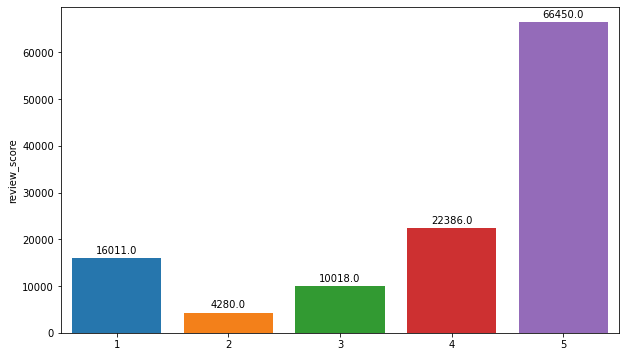

In [28]:
fig = plt.figure(figsize=(10, 6))

bp = sns.barplot(
    x=data['review_score'].sort_index().sort_values().unique(
    ),  # attention à l'ordre, ajout .sort_index().sort_values()
    y=data['review_score'].value_counts().sort_index(),
    data=data,
    saturation=0.9,
    # order=order,
    # color='darkred',
    ci=None)

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

In [29]:
labels = x = data['review_score'].sort_index().sort_values().unique()
values = data['review_score'].value_counts().sort_index()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text='Review scores',
    # Add annotations in the center of the donut pies.
    # annotations=[dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
    #             dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)]
)
fig.show()

### Régions du Brésil

https://fr.wikipedia.org/wiki/Régions_du_Brésil

Carte des différentes régions du Brésil :
1. Région Centre-Ouest --- MT, MS, GO, DF
2. Région Nord-Est --- AL, BA, CE, MA, PB, PE, PI, RN, SE, NE
3. Région Nord --- AC, AP, AM, PA, RO, RR, TO
4. Région Sud-Est --- SP, MG, RJ, ES
5. Région Sud --- PR, SC, RS

<img align="left" src="images\bresil.png" style="width: 400px;"/>
<img align="right" src="images\bresil_state.png" style="width: 550px;"/>

In [30]:
data['customer_state'].nunique()

27

In [31]:
CustomerState = data['customer_state'].value_counts().head(73).to_frame()
CustomerState.style.background_gradient(cmap='Reds')

# 4. Feature Engineering

#### Rappelons la classification RFM des clients très connue dans marketing. Nous allons créer les variables de RFM ainsi que d'autre variables qui caractérisent les clients et les commandes.

#### RFM (Récence, Fréquence, Montant)

Le classement RFM se fait en fonction de 3 critères :

- Récence : date du dernier achat ou dernier contact client
- Fréquence : fréquence des achats sur une période de référence donnée
- Montant : somme des achats cumulés sur cette période

## 4.1 Caractéristiques du client
Nous allons tout d'abord créer les features qui caracterise le client :

<table align="left", style="height:100px">
    <caption>Caractéristiques du client</caption>
  <tr>
    <th style="text-align:left">Feature </th>
    <th style="text-align:left">Explication</th> 
  </tr>
  <tr>
    <td style="text-align:left">ancienneté_du_client</td>
    <td style="text-align:left">premier achat (en jours)</td> 
  </tr>
  <tr>
    <td style="text-align:left">date_derniere_commande</td>
    <td style="text-align:left">date du dernier achat</td> 
  </tr>
  <tr>
    <td style="text-align:left">nb_commandes</td>
    <td style="text-align:left">le nombre de commandes effectués par le client</td> 
  </tr>
  <tr>
    <td style="text-align:left">nb_payements</td>
    <td style="text-align:left">le nombre de payements effectués par le client</td> 
  </tr>
  <tr>
    <td style="text-align:left">nb_produits</td>
    <td style="text-align:left">le nombre de produits achetés par le client</td> 
  </tr>
  <tr>
    <td style="text-align:left">depense_total </td>
    <td style="text-align:left">somme des achats cumulés</td> 
  </tr>
   <tr>
    <td style="text-align:left">review_score</td>
    <td style="text-align:left">le note donné par le client (min)</td> 
  </tr>
    
</table>

<h2 style="color:darkgreen;font-size:20px">ancienneté_du_client</h2>

In [32]:
# Convertir les types de dates à la forme datetype de pandas

date_columns = [
    'order_purchase_timestamp', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for column in date_columns:
    data[column] = data[column].astype('datetime64[ns]')

In [33]:
last_day = data['order_purchase_timestamp'].max()
last_day

Timestamp('2018-10-17 17:30:18')

In [34]:
data['anciennete_du_client'] = last_day - data[
    'order_purchase_timestamp'].groupby(
        data['customer_unique_id']).transform('min')

In [35]:
data['anciennete_du_client'] = data['anciennete_du_client'].dt.days

<AxesSubplot:xlabel='anciennete_du_client', ylabel='Count'>

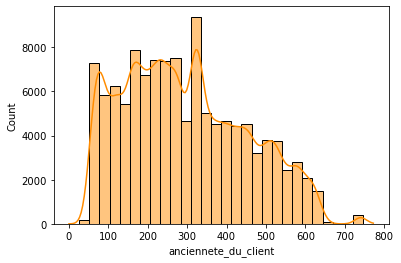

In [36]:
sns.histplot(data=data,
             x='anciennete_du_client',
             kde=True,
             bins=30,
             color="darkorange")

<h2 style="color:darkgreen;font-size:20px"> + last_purchase (pour maintenance)</h2>

In [37]:
data['last_purchase'] = data['order_purchase_timestamp'].groupby(
    data['customer_unique_id']).transform('max')

<h2 style="color:darkgreen;font-size:20px">date_derniere_commande</h2>

In [38]:
data['date_derniere_commande'] = last_day - data[
    'order_purchase_timestamp'].groupby(
        data['customer_unique_id']).transform('max')

In [39]:
data['date_derniere_commande'] = data['date_derniere_commande'].dt.days

<AxesSubplot:xlabel='date_derniere_commande', ylabel='Count'>

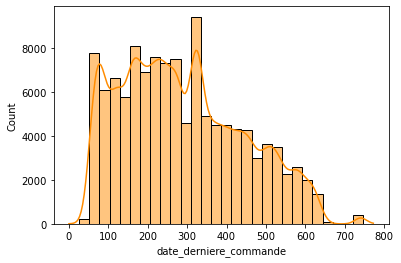

In [40]:
sns.histplot(data=data,
             x='date_derniere_commande',
             kde=True,
             bins=30,
             color="darkorange")

<h2 style="color:darkgreen;font-size:20px">nb_commandes</h2>

In [41]:
data['nb_commandes'] = data.groupby(
    'customer_unique_id')['order_id'].transform('nunique')

<AxesSubplot:xlabel='nb_commandes', ylabel='Count'>

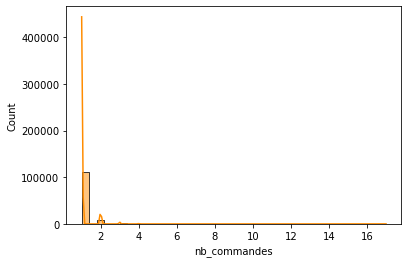

In [42]:
sns.histplot(data=data,
             x='nb_commandes',
             kde=True,
             bins=40,
             color="darkorange")

In [43]:
NbCommandes = data['nb_commandes'].value_counts().head(40).to_frame()
NbCommandes.style.background_gradient(cmap='Reds')

<h2 style="color:darkgreen;font-size:20px">nb_payements</h2>

In [44]:
data['nb_payements'] = data.groupby(
    'customer_unique_id')['customer_id'].transform('count')

<h2 style="color:darkgreen;font-size:20px">nb_produits</h2>

In [45]:
data['nb_produit'] = data.groupby(
    'customer_unique_id')['product_id'].transform('nunique')

<h2 style="color:darkgreen;font-size:20px">depense_total</h2>

In [46]:
data['depense_total'] = data.groupby(
    'customer_unique_id')['payment_value'].transform('sum')

<AxesSubplot:xlabel='depense_total', ylabel='Count'>

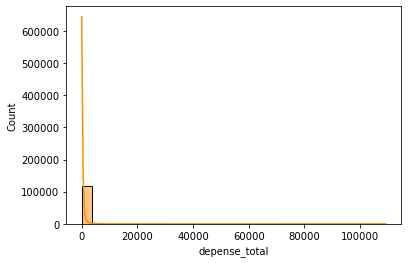

In [47]:
sns.histplot(data=data,
             x='depense_total',
             kde=True,
             bins=30,
             color="darkorange")

In [48]:
data['depense_total'] = data['depense_total'].round().astype('Int64')

<h2 style="color:darkgreen;font-size:20px">review_score</h2>

In [49]:
data['review_score_min'] = data.groupby('customer_unique_id')[
    'review_score'].transform('min').round().astype('Int64')

### La plupart des clients ne fait qu'un seul achat :

In [50]:
(data['anciennete_du_client'] -
 data['date_derniere_commande']).value_counts().sort_values(
     ascending=False).head()

0     113065
2        146
1        145
13       116
7         97
dtype: int64

<AxesSubplot:ylabel='Count'>

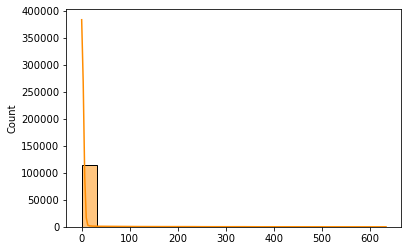

In [51]:
sns.histplot(data=data,
             x=data['anciennete_du_client'] - data['date_derniere_commande'],
             kde=True,
             bins=20,
             color="darkorange")

### Quelques exemples des clients pour vérifier les variables crées

In [52]:
data[data['customer_unique_id'] == '9a736b248f67d166d2fbb006bcb877c3']

customer_id                customer_unique_id  \
22436  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22437  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22438  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22439  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22440  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22441  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22442  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22443  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22444  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22445  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22446  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22447  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22448  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22449  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22450  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22451  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22452  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22453  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22454  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22455  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22456  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22457  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22458  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22459  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22460  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22461  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22462  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22463  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22464  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22465  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22466  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22467  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22468  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22469  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22470  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22471  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22472  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22473  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22474  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22475  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22476  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22477  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22478  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22479  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22480  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22481  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22482  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22483  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22484  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22485  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22486  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
22487  270c23a11d024a44c

In [53]:
data[data['customer_unique_id'] ==
     '9a736b248f67d166d2fbb006bcb877c3']['payment_value'].sum()

556.13

In [54]:
data[data['customer_unique_id'] ==
     '9a736b248f67d166d2fbb006bcb877c3']['price'].sum()

2847.7799999999993

In [55]:
data[data['customer_unique_id'] ==
     '9a736b248f67d166d2fbb006bcb877c3']['freight_value'].sum()

1405.9800000000002

In [56]:
data[data['customer_unique_id'] == '6469f99c1f9dfae7733b25662e7f1782']

customer_id                customer_unique_id  \
20227   65a75a3c78a824c9df00b338e265023a  6469f99c1f9dfae7733b25662e7f1782   
20228   65a75a3c78a824c9df00b338e265023a  6469f99c1f9dfae7733b25662e7f1782   
21084   7e4a91675986931608b18f4ade346efb  6469f99c1f9dfae7733b25662e7f1782   
32011   1f214d9540752e0a04a499a0f30ab877  6469f99c1f9dfae7733b25662e7f1782   
36267   91bd4ed51ee3835599963b967d9b9bbc  6469f99c1f9dfae7733b25662e7f1782   
61366   4478700ff008d3fffa02e95d89b9795f  6469f99c1f9dfae7733b25662e7f1782   
74389   a6a4a92ed2dfb40d31282925d93feebd  6469f99c1f9dfae7733b25662e7f1782   
105193  3f3c7b01b38222e1e68d3f03df8cd439  6469f99c1f9dfae7733b25662e7f1782   
105194  3f3c7b01b38222e1e68d3f03df8cd439  6469f99c1f9dfae7733b25662e7f1782   

       customer_city customer_state  customer_lat  customer_lng  \
20227         santos             SP    -23.965227    -46.343581   
20228         santos             SP    -23.965227    -46.343581   
21084         santos             SP    -23.965227    -46.343581   
32011         santos             SP    -23.965227    -46.343581   
36267         santos             SP    -23.965227    -46.343581   
61366         santos             SP    -23.965227    -46.343581   
74389         santos             SP    -23.965227    -46.343581   
105193        santos             SP    -23.965227    -46.343581   
105194        santos             SP    -23.965227    -46.343581   

                                order_id order_status  \
20227   48a51dd8d092c2c777f8dc6446f5684b    delivered   
20228   48a51dd8d092c2c777f8dc6446f5684b    delivered   
21084   4266cc59dbee85121deb59ebfcf36eae    delivered   
32011   c12f5561ebbafe496b47371c0271e839    delivered   
36267   72a704e8fb6c499fad9b26bd8873bd39    delivered   
61366   ccb1046449f1a494de800567e7cb5979    delivered   
74389   bcf2e0138ecf66a8688ab369b802d57a    delivered   
105193  1700e1cfac9c6837da3ccdb6c36c77de    delivered   
105194  1700e1cfac9c6837da3ccdb6c36c77de    delivered   

       order_purchase_timestamp order_delivered_customer_date  \
20227       2018-01-16 12:05:27           2018-01-22 16:38:32   
20228       2018-01-16 12:05:27           2018-01-22 16:38:32   
21084       2017-10-05 13:16:25           2017-10-13 16:59:00   
32011       2017-11-15 17:58:15           2017-11-21 17:45:00   
36267       2017-12-25 20:54:42           2017-12-28 21:07:57   
61366       2018-06-28 00:43:34           2018-06-29 20:52:48   
74389       2017-09-19 01:02:44           2017-09-20 17:21:48   
105193      2017-12-25 21:22:03           2017-12-28 21:14:15   
105194      2017-12-25 21:22:03           2017-12-28 21:14:15   

       order_estimated_delivery_date                        product_id  \
20227                     2018-01-31  8a443635fdf9759915c9be5be2e3b862   
20228                     2018-01-31  c211ff3068fcd2f8898192976d8b3a32   
21084                     2017-10-30  9359cb8632f702a16b12ff5464d82d03   
32011                     2017-12-05  9e4991475c72f651bfc73d697bf5ecd4   
36267                     2018-01-15  c211ff3068fcd2f8898192976d8b3a32   
61366                     2018-07-12  c211ff3068fcd2f8898192976d8b3a32   
74389                     2017-09-29  36c2fb4fa746273709c373f6d6ec6796   
105193                    2018-01-15  c211ff3068fcd2f8898192976d8b3a32   
105194                    2018-01-15  c211ff3068fcd2f8898192976d8b3a32   

                               seller_id  price  freight_value  \
20227   da8622b14eb17ae2831f4ac5b9dab84a   99.9          15.16   
20228   da8622b14eb17ae2831f4ac5b9dab84a   24.9           6.32   
21084   cca3071e3e9bb7d12640c9fbe2301306  119.9          13.18   
32011   4a3ca9315b744ce9f8e9374361493884  239.9          13.18   
36267   da8622b14eb17ae2831f4ac5b9dab84a   24.9           9.09   
61366   da8622b14eb17ae2831f4ac5b9dab84a   24.9           7.75   
74389   00ee68308b45bc5e2660cd833c3f81cc   80.0          11.77   
105193  da8622b14eb17ae2831f4ac5b9dab84a   24.9           9.09   
105194  da8622b14eb1

In [57]:
data[data['customer_unique_id'] ==
     '6469f99c1f9dfae7733b25662e7f1782']['payment_value'].sum()

973.09

In [58]:
data[data['customer_unique_id'] ==
     '6469f99c1f9dfae7733b25662e7f1782']['price'].sum()

664.1999999999999

In [59]:
data[data['customer_unique_id'] ==
     '6469f99c1f9dfae7733b25662e7f1782']['freight_value'].sum()

94.63000000000001

## 4.2 Caractéristiques de la commande
Nous allons à present créer les features qui caracterise la commande :

<table align="left", style="height:100px">
    <caption>Caractéristiques de commande</caption>
  <tr>
    <th style="text-align:left">Feature </th>
    <th style="text-align:left">Explication</th> 
  </tr>
  <tr>
    <td style="text-align:left">montant_commande_max</td>
    <td style="text-align:left">le montant maximum dépensé par le client</td> 
  </tr>
  <tr>
    <td style="text-align:left">montant_produit_max</td>
    <td style="text-align:left">le prix maximum</td> 
  </tr>
  <tr>
    <td style="text-align:left">frais_de_port_moy</td>
    <td style="text-align:left"> le frais de port en moyenne</td> 
  </tr>
  <tr>
    <td style="text-align:left">delai_livraison_max</td>
    <td style="text-align:left">(en jours)</td> 
  </tr>
  <tr>
    <td style="text-align:left">volume_produit_moy</td>
    <td style="text-align:left">volume maximum (en cm3) </td>
  </tr>
  <tr>
    <td style="text-align:left">densite_produit_max</td>
    <td style="text-align:left"> la dénsité du produit (en gr/cm3)</td>
  </tr>
    <tr>
    <td style="text-align:left">distance</td>
    <td style="text-align:left">la distance entre le client et le vendeur (en km)</td>
  </tr>
</table>

<h2 style="color:darkgreen;font-size:20px">montant_commande</h2>

In [60]:
#data['montant_commande_moy'] = data.groupby('customer_unique_id')['payment_value'].transform('mean').round().astype('Int64')
data['montant_commande_max'] = data.groupby('customer_unique_id')[
    'payment_value'].transform('max').round().astype('Int64')
#data['montant_commande_min'] = data.groupby('customer_unique_id')['payment_value'].transform('min').round().astype('Int64')
#data['montant_commande_std'] = data.groupby('customer_unique_id')['payment_value'].transform('np.nanstd')

In [61]:
data.sample(10)

customer_id                customer_unique_id  \
71030   64c26ea8310a299e2d0785aa77ee1ca0  35e9d9d4919ffba0c9f249156fa9d433   
40457   f0c661c3c1e7d42a43f9ac9db2619c6c  c48466ed1f411eed0a0798f2388ccaf4   
86255   5f2d3a20b81937d3ef88d622b2f92035  4b0248ab9516b1c3c69cb1b9f5157014   
65199   5c9c326c6ba02d6301cb8c68292316f0  84bf9ae18880da8c86213d17a1bf9f4c   
35001   577c0e677251c5891fe5ea9764503e63  946cf33fc1bb3e94647ac24fae81e0e7   
110905  3c452be4bf253c6f9a9a04e35f09b220  728a151b4593fb7ae0787158df28752a   
64334   e2f19e9b81bf91b8582ee89d85312dc6  ae3bf7f6d63f0a735b67de84e7ee90a0   
39461   2081aaeb616d4391d1b0a7f26f2b548a  e00665e49df030cbd24259229beb5d54   
77182   c5982a46e1e7c7ae0cf888263ffbdd4f  6f252d1b5df37901745ef95fd68e103f   
27520   955719867f907f671d614150a5436c10  4cdfc1a496852b9eceec6101b4461754   

       customer_city customer_state  customer_lat  customer_lng  \
71030           maua             SP    -23.678575    -46.465084   
40457      sao paulo             SP    -23.626648    -46.739509   
86255       brasilia             DF    -15.759529    -47.838894   
65199      americana             SP    -22.720625    -47.307237   
35001      sao paulo             SP    -23.650256    -46.753725   
110905     sao paulo             SP    -23.491800    -46.641607   
64334       araguari             MG    -18.642201    -48.178015   
39461         palmas             TO    -10.317773    -48.302901   
77182    santa luzia             PB     -6.872212    -36.917456   
27520      carazinho             RS    -28.291245    -52.790256   

                                order_id order_status  \
71030   ba01067136771e2103d611dc1d74d709    delivered   
40457   aa94d94e210dc2b7a49812d3d82bb516    delivered   
86255   9b1b03659c8b48c95c05af1523108b12    delivered   
65199   7af905809ddbaaed2af20592006857e0    delivered   
35001   15c7a48b6ce2d3967a7e83d40f566b70    delivered   
110905  1ac4ac576a3e3ef61ffbb64937ed1f62    delivered   
64334   58f6630e08902025bfb3813a0774fabf    delivered   
39461   a185e5cd569eb1436c80f83bae2d91bb    delivered   
77182   317e0cc749ea443d1b14522905d44dbd    delivered   
27520   ab6087eb8ea6d8f8a36d6e787567bc64    delivered   

       order_purchase_timestamp order_delivered_customer_date  \
71030       2018-05-27 17:42:25           2018-06-04 17:06:09   
40457       2017-11-07 10:19:53           2017-11-10 19:19:46   
86255       2017-09-24 14:30:50           2017-10-05 16:59:40   
65199       2018-04-15 23:38:38           2018-04-21 17:20:57   
35001       2017-09-18 15:53:51           2017-09-25 20:17:52   
110905      2018-06-06 11:44:08           2018-06-18 16:12:54   
64334       2018-06-22 15:39:23           2018-06-29 13:02:46   
39461       2018-04-03 21:28:13           2018-04-19 18:41:55   
77182       2018-06-09 13:19:56           2018-06-26 15:10:54   
27520       2017-08-17 20:12:07           2017-08-29 18:16:09   

       order_estimated_delivery_date                        product_id  \
71030                     2018-06-29  a8b0dd2c57b49b649373ff5a495a697e   
40457                     2017-11-27  d6d73c1fe2e8c0e3e90e2421ffa4b963   
86255                     2017-10-23  a8fe47ad6f852f93cc92c7b408687de3   
65199                     2018-05-11  67c4679242adec87208d4681e66cb23b   
35001                     2017-10-10  aea5937ba2b757b9fc5017f2d11f288f   
110905                    2018-07-04  af91083bde899b201798b52ae89babea   
64334                     2018-07-23  668e8ee8f69c3545109fc40f72336e8f   
39461                     2018-05-08  55552e80f046fafe13e130e6a07745e2   
77182                     2018-07-25  358d37dd53f3e05e0210a3ca3d953aca   
27520                     2017-09-13  a0f73bcb4e1fcfb056cfdc6ca7222249   

                               seller_id   price  freight_value  \
71030   8e8a7ce9f2f970dc00e2acf6f6e199f6  135.00          15.83   
40457   01c97ebb5cdac52891c0ed1c37ba0012   29.40          12.69   
86255   aaed1309374718fdd995ee4c58c9dfcd   72.90          27.05   
65199

kim la bu : '513f24c01c5b22fe1b97bb2ff08f1808'

<h2 style="color:darkgreen;font-size:20px">montant_produit</h2>

In [62]:
# data['montant_produit_moy'] = data.groupby('customer_unique_id')['price'].transform('mean').round().astype('Int64')
data['montant_produit_max'] = data.groupby(
    'customer_unique_id')['price'].transform('max').round().astype('Int64')
# data['montant_produit_min'] = data.groupby('customer_unique_id')['price'].transform('min').round().astype('Int64')

<h2 style="color:darkgreen;font-size:20px">frais_de_port</h2>

In [63]:
data['frais_de_port_moy'] = data.groupby('customer_unique_id')[
    'freight_value'].transform('mean').round().astype('Int64')
# data['frais_de_port_max'] = data.groupby('customer_unique_id')['freight_value'].transform('max').round().astype('Int64')
# data['frais_de_port_min'] = data.groupby('customer_unique_id')['freight_value'].transform('min').round().astype('Int64')

<h2 style="color:darkgreen;font-size:20px">delai_livraison</h2>

In [64]:
status = data['order_status'].value_counts().head(40).to_frame()
status.style.background_gradient(cmap='Reds')

In [65]:
status = data[data['order_delivered_customer_date'].isna(
)]['order_status'].value_counts().head(40).to_frame()
status.style.background_gradient(cmap='Reds')

In [66]:
data[data['order_delivered_customer_date'].isna()]

customer_id                customer_unique_id  \
52      f34a6e874087ec1f0e3dab9fdf659c5d  233896de79986082f1f479f1f85281cb   
53      c132855c926907970dcf6f2bf0b33a24  a8ae36a2bb6c2bbc3b5d62ede131c9ef   
84      4c7241af24b5344cb01fe687643de4fe  b157c176c3fe04914fde33f2dc8b878a   
95      f6529ffebe6b3440d45d89604a4239ac  e5dbefdfdf3eff75c8e6cd655f128279   
119     ae76a4650235ab18764708174f1da31e  2b6082a140c439e2df870c85b0aa5e88   
...                                  ...                               ...   
118918  6a65b5d6d4f4c9dfda93798cf014ee47  5b66137675c164a7df3b639bf1e86134   
118954  9ce70b8dafe76524f3d5e5e68cbf29f5  6edd9e4a22b7ab02db2a87f13bfd2d2a   
118962  2a6fc1968c4a29c9c258bb1994afbc7f  205a1c797b2c6e626d560900a3ebde6b   
119034  f83083fcbc51d12f8279b5713c2d4b4d  0465f164e35aba70f70e911b252513a9   
119108  35de8ab44ecc9a65225a5ef51294d204  3011394a1b8d1b04e425dd5dc77cbaaf   

                customer_city customer_state  customer_lat  customer_lng  \
52                  ituiutaba             MG    -18.976355    -49.462975   
53                taquarituba             SP    -23.532344    -49.246322   
84                  fortaleza             CE     -3.717085    -38.572581   
95                nova iguacu             RJ    -22.761268    -43.504602   
119                 sao paulo             SP    -23.452156    -46.718806   
...                       ...            ...           ...           ...   
118918              sao paulo             SP    -23.596717    -46.483739   
118954         ribeirao preto             SP    -21.177891    -47.743375   
118962          volta redonda             RJ    -22.488555    -44.071911   
119034              araguaina             TO     -7.197548    -48.198715   
119108  sao bernardo do campo             SP    -23.662449    -46.559517   

                                order_id order_status  \
52      6e98de3a85c84ead6689189b825d35b5     canceled   
53      b5172d4a722c0ebb34c29bbbb7a3cb42     invoiced   
84      ad380680e87dea0f2abf5cd5bace626c      shipped   
95      cc07a8fdd3a8e94d683c8142a117dbc1      shipped   
119     4c33ec562d9dc5655e160913aa86eb53      shipped   
...                                  ...          ...   
118918  8c0dd54ff6a273a02de12494c6bf299f      shipped   
118954  e5e59fe47003046e2ed48ebb641564b2      shipped   
118962  12d9fe1a3efa51a7fae337cba819adc1      shipped   
119034  67384817c871ae183b24f9a0a6eb9bbc      shipped   
119108  27613f16c823ee73e2da1a6116467293   processing   

       order_purchase_timestamp order_delivered_customer_date  \
52          2018-03-15 10:07:02                           NaT   
53          2018-04-17 13:14:13                           NaT   
84          2018-01-21 15:54:02                           NaT   
95          2018-01-11 17:11:11                           NaT   
119         2017-08-11 23:47:48                           NaT   
...                         ...                           ...   
118918      2018-07-17 22:35:46                           NaT   
118954      2018-04-27 13:52:12                           NaT   
118962      2017-02-08 13:07:19                           NaT   
119034      2018-01-25 12:12:37                           NaT   
119108      2018-01-04 20:10:42                           NaT   

       order_estimated_delivery_date                        product_id  \
52                        2018-04-09                               NaN   
53                        2018-05-24  76d58c2f53f7d340cb9fe2d8514e38ae   
84                        2018-02-20  13c270dd3d811877114b2a225436a79a   
95                        2018-02-09  5a848e4ab52fd5445cdc07aab1c40e48   
119                       2017-09-11  07c055536ebf10dfbb6c6db6dbfc36e5   
...                              ...                               ...   
118918                    2018-08-02  41db6d8062fcd38410c699743ccc0265   
118954                    2018-05-23  a0b7d5a992ccda646f2d34e418fff5a0   
118962                    2017-03-17  61509eaeb

In [67]:
data['delai_livraison_max'] = (data['order_delivered_customer_date'] -
                               data['order_purchase_timestamp']).groupby(
                                   data['customer_unique_id']).transform('max')

In [68]:
data['delai_livraison_max'] = data['delai_livraison_max'].dt.days

In [69]:
data['delai_livraison_max'] = data['delai_livraison_max'].round().astype(
    'Int64')

<h2 style="color:darkgreen;font-size:20px">delai_estime</h2>

In [70]:
data['delai_estime'] = (data['order_delivered_customer_date'] -
                        data['order_estimated_delivery_date']).groupby(
                            data['customer_unique_id']).transform('max')

In [71]:
data['delai_estime'] = data['delai_estime'].dt.days

In [72]:
data['delai_estime'] = data['delai_estime'].round().astype('Int64')

<h2 style="color:darkgreen;font-size:20px">volume_produit</h2>

In [73]:
# volume

data['volume_produit'] = data['product_length_cm'] * data[
    'product_height_cm'] * data['product_width_cm']
data['volume_produit'] = data['volume_produit'].round().astype('Int64')

In [74]:
data['volume_produit_max'] = data['volume_produit'].groupby(
    data['customer_unique_id']).transform('max')

<h2 style="color:darkgreen;font-size:20px">densite_produit</h2>

<h2 style="color:darkgreen;font-size:16px">densite = poids / volume </h2>

In [75]:
data['densite_produit'] = (
    (data['product_weight_g'] / data['volume_produit']) * 100)

In [76]:
data['densite_produit'] = data['densite_produit'].astype(
    'float64').round().astype('Int64')

In [77]:
# data['densite_produit_moy'] = data['densite_produit'].groupby(data['customer_unique_id']).transform('mean').astype('float64').round().astype('Int64')
data['densite_produit_max'] = data['densite_produit'].groupby(
    data['customer_unique_id']).transform('max')
# data['densite_produit_min'] = data['densite_produit'].groupby(data['customer_unique_id']).transform('min')

In [78]:
data.drop(['volume_produit', 'densite_produit'], axis=1, inplace=True)

<h2 style="color:darkgreen;font-size:20px">distance</h2>

<h2 style="color:darkgreen;font-size:16px">distance entre le client et le vendeur</h2>

In [79]:
data['distance_seller_to_customer'] = [
    haversine(lon1, lat1, lon2, lat2) for lon1, lat1, lon2, lat2 in zip(
        data['customer_lng'], data['customer_lat'], data['seller_lng'],
        data['seller_lat'])
]

In [80]:
data['distance'] = data.groupby('customer_unique_id')[
    'distance_seller_to_customer'].transform('mean').round().astype('Int64')

In [81]:
data['distance']

0          349
1          414
2           30
3           19
4          220
          ... 
119146     358
119147     251
119148    2367
119149     999
119150      45
Name: distance, Length: 119145, dtype: Int64

## 4.3 Nouveaux features definis à partir de variables categorielles

Nous allons à present créer les features definis à partir de variables categorielles :

<table align="left", style="height:100px">
    <caption>Traitement des variables categorielles</caption>
  <tr>
    <th style="text-align:left">Feature </th>
    <th style="text-align:left">Explication</th>
  </tr>
  <tr>
    <td style="text-align:left">taux_type_payement</td>
    <td style="text-align:left">pourcentage de type de paiement</td> 
  </tr>
  <tr>
    <td style="text-align:left">categorie_produit</td>
    <td style="text-align:left">8 catégories pricipales des produits</td> 
  </tr>
  <tr>
    <td style="text-align:left">region_client</td>
    <td style="text-align:left">5 regions où les clients vivent</td> 
  </tr>
</table>

<h2 style="color:darkgreen;font-size:20px">taux_type_payement</h2>

In [82]:
df_type_payement = data.groupby(
    [data['customer_unique_id'],
     data['payment_type']]).size().unstack(fill_value=0)

In [83]:
df_type_payement

payment_type                      boleto  credit_card  debit_card  voucher
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2       0            1           0        0
0000b849f77a49e4a4ce2b2a4ca5be3f       0            1           0        0
0000f46a3911fa3c0805444483337064       0            1           0        0
0000f6ccb0745a6a4b88665a16c9f078       0            1           0        0
0004aac84e0df4da2b147fca70cf8255       0            1           0        0
...                                  ...          ...         ...      ...
fffcf5a5ff07b0908bd4e2dbc735a684       0            2           0        0
fffea47cd6d3cc0a88bd621562a9d061       0            1           0        0
ffff371b4d645b6ecea244b27531430a       0            1           0        0
ffff5962728ec6157033ef9805bacc48       0            1           0        0
ffffd2657e2aad2907e67c3e9daecbeb       0            1           0        0

[96093 rows x 4 columns]

In [84]:
data = pd.merge(data, df_type_payement, how='left', on='customer_unique_id')

In [85]:
type_payement = data['payment_type'].unique()
type_payement

for column in type_payement:
    data[column] = (data[column] / data['nb_payements'] *
                    100).round().astype('Int64')

<h2 style="color:darkgreen;font-size:20px">categorie_produit</h2>

In [86]:
data['product_category_name_english'].nunique()

71

In [87]:
cat = data['product_category_name_english'].value_counts().head(10).to_frame()
cat.style.background_gradient(cmap='Reds')

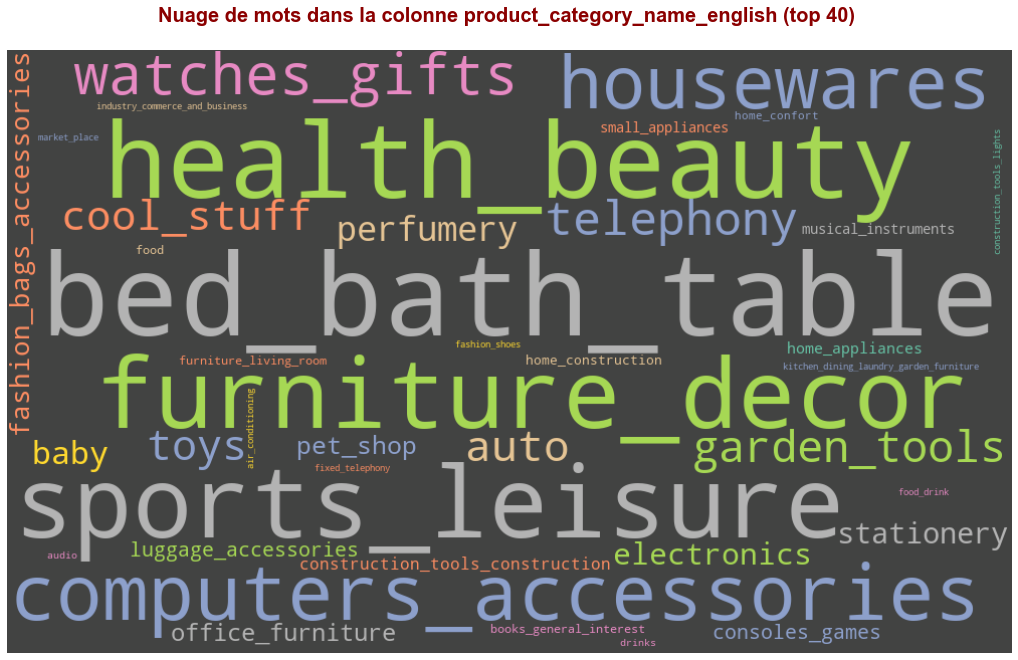

In [88]:
plot_world_cloud(data, 'product_category_name_english', 40)

In [89]:
cat_maison = (data['product_category_name_english'].str.contains(
    'fashion_childrens_clothes|la_cuisine|home_comfort_2|flowers|diapers_and_hygiene|furniture_mattress_and_upholstery|party_supplies|fashio_female_clothing|small_appliances_home_oven_and_coffee|fashion_male_clothing|christmas_supplies|home_appliances_2|fashion_shoes|kitchen_dining_laundry_garden_furniture|home_confort|furniture_living_room|home_appliances|small_appliances|bed_bath_table|health_beauty|furniture_decor|housewares|watches_gifts|toys|cool_stuff|perfumery|baby|stationery|luggage_accessories'
))

cat_tech = (data['product_category_name_english'].str.contains(
    'tablets_printing_image|computers_accessories|telephony|auto|electronics|consoles_games|musical_instruments|fixed_telephony|computers'
))

cat_maison_exterior = (data['product_category_name_english'].str.contains(
    'signaling_and_security|costruction_tools_garden|kitchen_dining_laundry_garden_furniture|garden_tools|construction_tools_construction|home_construction|construction_tools_lights|air_conditioning'
))

cat_books = (data['product_category_name_english'].str.contains(
    'cds_dvds_musicals|books_general_interest|audio|books_technical|art|cine_photo|dvds_blu_ray|books_imported|music|arts_and_craftmanship'
))

cat_foods = (data['product_category_name_english'].str.contains(
    'food|drinks|market_place|food_drink'))

cat_sports = (data['product_category_name_english'].str.contains(
    'sports_leisure|fashion_sport'))

cat_industry = (data['product_category_name_english'].str.contains(
    'industry_commerce_and_business|agro_industry_and_commerce|construction_tools_safety|security_and_services'
))

cat_office = (
    data['product_category_name_english'].str.contains('office_furniture'))

data['maison_gift_beauty'] = cat_maison
data['technologie'] = cat_tech
data['maison_exterior'] = cat_maison_exterior
data['books_media'] = cat_books
data['foods_beverages'] = cat_foods
data['sports'] = cat_sports
data['industry'] = cat_industry
data['office_furniture'] = cat_office

In [90]:
data['maison_gift_beauty'].replace({False: 0, True: 1}, inplace=True)
data['technologie'].replace({False: 0, True: 1}, inplace=True)
data['maison_exterior'].replace({False: 0, True: 1}, inplace=True)
data['books_media'].replace({False: 0, True: 1}, inplace=True)
data['foods_beverages'].replace({False: 0, True: 1}, inplace=True)
data['sports'].replace({False: 0, True: 1}, inplace=True)
data['industry'].replace({False: 0, True: 1}, inplace=True)
data['office_furniture'].replace({False: 0, True: 1}, inplace=True)

In [91]:
data['maison_gift_beauty'] = data['maison_gift_beauty'].astype('Int64')
data['technologie'] = data['technologie'].astype('Int64')
data['maison_exterior'] = data['maison_exterior'].astype('Int64')
data['books_media'] = data['books_media'].astype('Int64')
data['foods_beverages'] = data['foods_beverages'].astype('Int64')
data['sports'] = data['sports'].astype('Int64')
data['industry'] = data['industry'].astype('Int64')
data['office_furniture'] = data['office_furniture'].astype('Int64')

In [92]:
liste = [
    'maison_gift_beauty', 'technologie', 'maison_exterior', 'books_media',
    'foods_beverages', 'sports', 'industry', 'office_furniture'
]

liste
for column in liste:
    data[column] = data[column].fillna(0)

In [93]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'customer_lat', 'customer_lng', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_id', 'seller_id', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category_name_english', 'review_score',
       'seller_city', 'seller_state', 'seller_lat', 'seller_lng',
       'anciennete_du_client', 'last_purchase', 'date_derniere_commande',
       'nb_commandes', 'nb_payements', 'nb_produit', 'depense_total',
       'review_score_min', 'montant_commande_max', 'montant_produit_max',
       'frais_de_port_moy', 'delai_livraison_max', 'delai_estime',
       'volume_produit_max', 'densite_produit_max',
       'distance_seller_to_

<h2 style="color:darkgreen;font-size:20px">region_client</h2>

In [94]:
region_CO = (data['customer_state'].str.contains('MT|MS|GO|DF'))
region_NE = (
    data['customer_state'].str.contains('AL|BA|CE|MA|PB|PE|PI|RN|SE|NE'))
region_N = (data['customer_state'].str.contains('AC|AP|AM|PA|RO|RR|TO'))
region_SE = (data['customer_state'].str.contains('SP|MG|RJ|ES'))
region_S = (data['customer_state'].str.contains('PR|SC|RS'))

In [95]:
data['Centre_Ouest'] = region_CO
data['Nord_Est'] = region_NE
data['Nord'] = region_N
data['Sud_Est'] = region_SE
data['Sud'] = region_S

data['Centre_Ouest'].replace({False: 0, True: 1}, inplace=True)
data['Nord_Est'].replace({False: 0, True: 1}, inplace=True)
data['Nord'].replace({False: 0, True: 1}, inplace=True)
data['Sud_Est'].replace({False: 0, True: 1}, inplace=True)
data['Sud'].replace({False: 0, True: 1}, inplace=True)

In [96]:
mapping = {
    'MT': 'Centre_Ouest',
    'MS': 'Centre_Ouest',
    'GO': 'Centre_Ouest',
    'DF': 'Centre_Ouest',
    'AL': 'Nord_Est',
    'BA': 'Nord_Est',
    'CE': 'Nord_Est',
    'MA': 'Nord_Est',
    'PB': 'Nord_Est',
    'PE': 'Nord_Est',
    'PI': 'Nord_Est',
    'RN': 'Nord_Est',
    'SE': 'Nord_Est',
    'NE': 'Nord_Est',
    'AC': 'Nord',
    'AP': 'Nord',
    'AM': 'Nord',
    'PA': 'Nord',
    'RO': 'Nord',
    'RR': 'Nord',
    'TO': 'Nord',
    'SP': 'Sud_Est',
    'MG': 'Sud_Est',
    'RJ': 'Sud_Est',
    'ES': 'Sud_Est',
    'PR': 'Sud',
    'SC': 'Sud',
    'RS': 'Sud',
}

data['region'] = data['customer_state'].replace(mapping)

# 5. Analyse Exploratoire - II

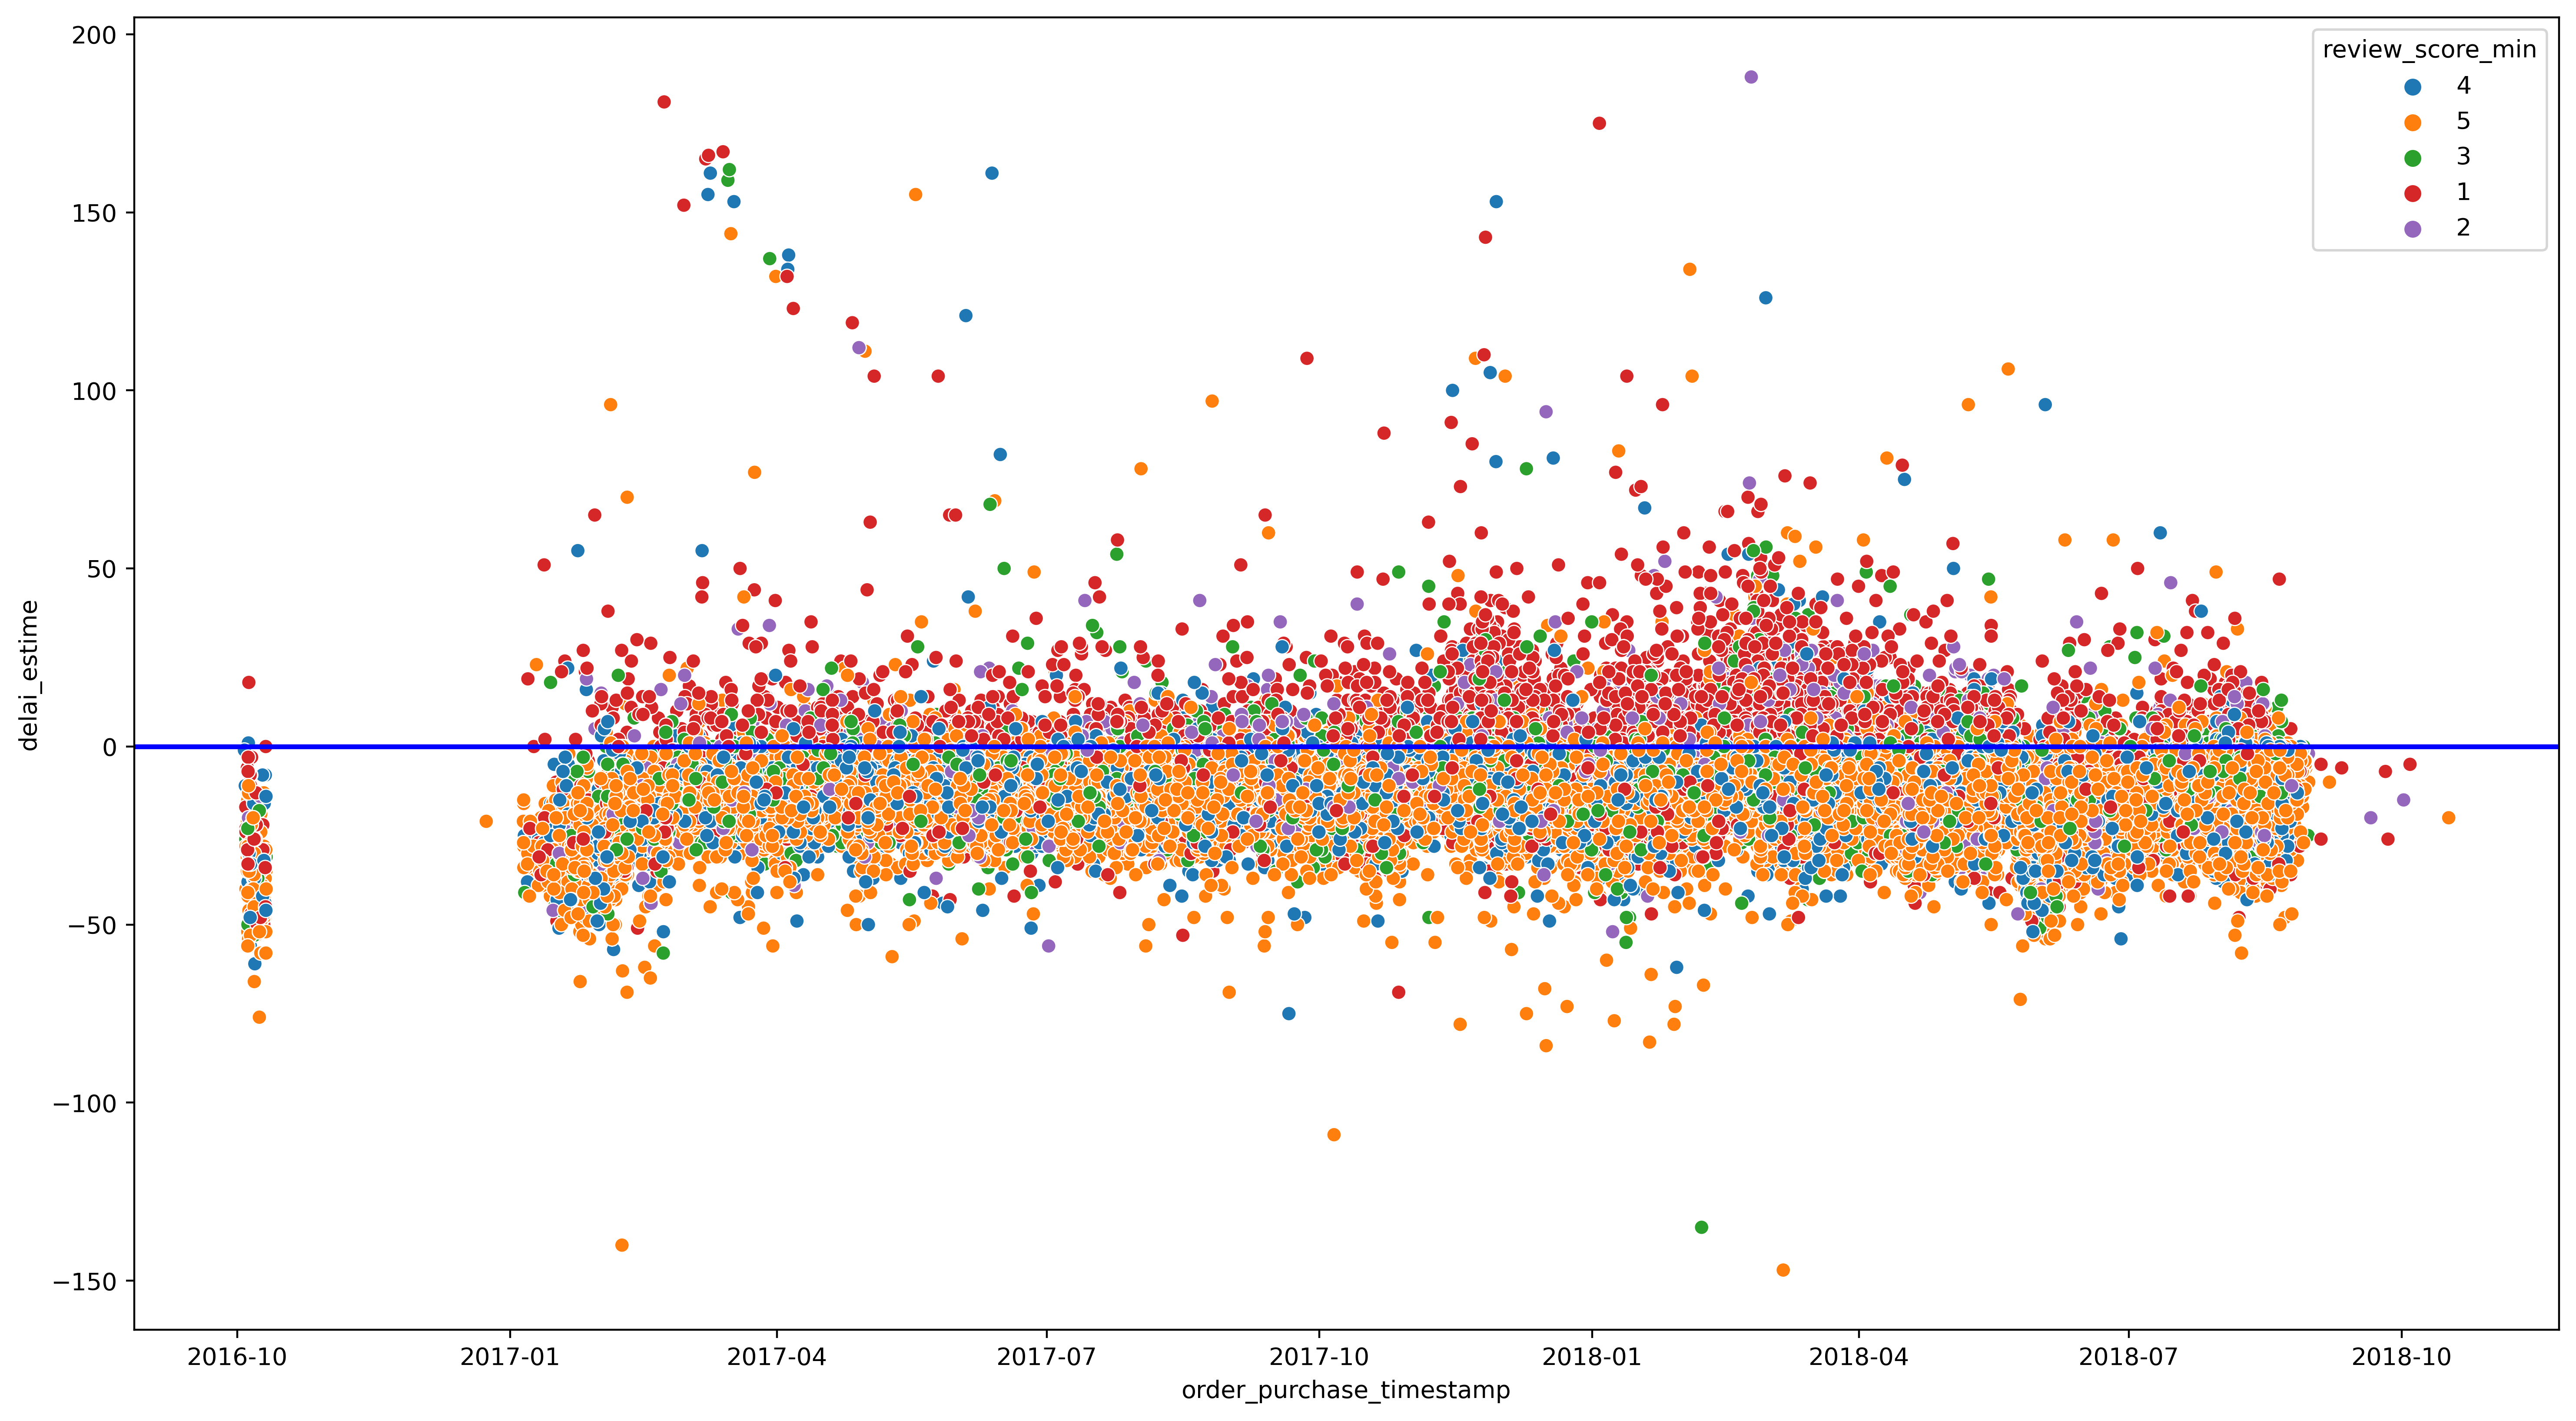

In [97]:
plt.subplots(figsize=(18, 10), dpi=400)

sns.scatterplot(data=data,
                x=data['order_purchase_timestamp'],
                y=data['delai_estime'],
                hue=data['review_score_min'].astype('str'))
plt.axhline(y=0, linestyle='-', color='blue', linewidth=2)

### Une population située majoritairement dans le sud-est du pays

In [98]:
reg = data['region'].value_counts().head(10).to_frame()
reg.style.background_gradient(cmap='Reds')

In [99]:
labels = x = data['region'].sort_index().sort_values().unique()
values = data['region'].value_counts().sort_index()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text="Population des clients par régions", )
fig.show()

### Une population constituée principalement de clients occasionnels

In [100]:
labels = x = data['nb_commandes'].sort_index().sort_values().unique()
values = data['nb_commandes'].value_counts().sort_index()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text="Nombre de commandes", )
fig.show()

In [101]:
used = [
    'customer_id', 'payment_installments', 'payment_value', 'customer_city',
    'customer_state', 'order_id', 'order_status', 'order_purchase_timestamp',
    'order_delivered_customer_date', 'order_estimated_delivery_date',
    'product_id', 'seller_id', 'price', 'freight_value', 'payment_sequential',
    'payment_type', 'product_category_name', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm',
    'review_score', 'seller_city', 'seller_state', 'Centre_Ouest', 'Nord_Est',
    'Nord', 'Sud', 'Sud_Est', 'region', 'distance_seller_to_customer',
    'customer_lat', 'customer_lng', 'seller_lat', 'seller_lng',
    'product_category_name_english'
]

In [102]:
data_clean = data.drop(used, axis=1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119145 entries, 0 to 119144
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer_unique_id      119145 non-null  object        
 1   anciennete_du_client    119145 non-null  int64         
 2   last_purchase           119145 non-null  datetime64[ns]
 3   date_derniere_commande  119145 non-null  int64         
 4   nb_commandes            119145 non-null  int64         
 5   nb_payements            119145 non-null  int64         
 6   nb_produit              119145 non-null  int64         
 7   depense_total           119145 non-null  Int64         
 8   review_score_min        119145 non-null  Int64         
 9   montant_commande_max    119145 non-null  Int64         
 10  montant_produit_max     118415 non-null  Int64         
 11  frais_de_port_moy       118415 non-null  Int64         
 12  delai_livraison_max     115976

In [103]:
data_clean.describe(include='all', datetime_is_numeric=True)

customer_unique_id  anciennete_du_client  \
count                             119145         119145.000000   
unique                             96093                   NaN   
top     9a736b248f67d166d2fbb006bcb877c3                   NaN   
freq                                  75                   NaN   
mean                                 NaN            294.615435   
min                                  NaN              0.000000   
25%                                  NaN            169.000000   
50%                                  NaN            275.000000   
75%                                  NaN            407.000000   
max                                  NaN            772.000000   
std                                  NaN            154.259544   

                        last_purchase  date_derniere_commande   nb_commandes  \
count                          119145           119145.000000  119145.000000   
unique                            NaN                     NaN            NaN   
top                               NaN                     NaN            NaN   
freq                              NaN                     NaN            NaN   
mean    2018-01-01 21:57:57.830282240              288.349297       1.091175   
min               2016-09-04 21:15:19                0.000000       1.000000   
25%               2017-09-14 14:16:00              164.000000       1.000000   
50%               2018-01-21 11:13:57              269.000000       1.000000   
75%               2018-05-06 12:08:42              398.000000       1.000000   
max               2018-10-17 17:30:18              772.000000      17.000000   
std                               NaN              153.330993       0.411007   

         nb_payements     nb_produit  depense_total  review_score_min  \
count   119145.000000  119145.000000  119145.000000     119145.000000   
unique            NaN            NaN            NaN               NaN   
top               NaN            NaN            NaN               NaN   
freq              NaN            NaN            NaN               NaN   
mean         1.827143       1.167149     383.762886          3.965748   
min          1.000000       0.000000      10.000000          1.000000   
25%          1.000000       1.000000      71.000000          3.000000   
50%          1.000000       1.000000     135.000000          5.000000   
75%          2.000000       1.000000     283.000000          5.000000   
max         75.000000      15.000000  109313.000000          5.000000   
std          2.855419       0.587749    1669.213723          1.429142   

        montant_commande_max  montant_produit_max  frais_de_port_moy  \
count          119145.000000        118415.000000      118415.000000   
unique                   NaN                  NaN                NaN   
top                      NaN                  NaN                NaN   
freq                     NaN                  NaN                NaN   
mean              179.039851           125.296440          20.031820   
min                 4.000000             1.000000           0.000000   
25%                64.000000            43.000000          13.000000   
50%               113.000000            79.000000          16.000000   
75%               195.000000           140.000000          21.000000   
max             13664.000000          6735.000000         410.000000   
std               270.576994           187.773874          15.512887   

        delai_livraison_max   delai_estime  volume_produit_max  \
count         115976.000000  115976.000000       118400.000000   
unique                  NaN            NaN                 NaN   
top                     NaN            NaN                 NaN   
freq                    NaN            NaN                 NaN   
mean              12.255199     -11.731358        16283.123530   
min                0.000000    -147.000000          168.000000   
25%                6.000000     -17.000000         2992.000000  

In [104]:
data_clean.drop_duplicates(subset=['customer_unique_id'], inplace=True)

In [105]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96093 entries, 0 to 119144
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_unique_id      96093 non-null  object        
 1   anciennete_du_client    96093 non-null  int64         
 2   last_purchase           96093 non-null  datetime64[ns]
 3   date_derniere_commande  96093 non-null  int64         
 4   nb_commandes            96093 non-null  int64         
 5   nb_payements            96093 non-null  int64         
 6   nb_produit              96093 non-null  int64         
 7   depense_total           96093 non-null  Int64         
 8   review_score_min        96093 non-null  Int64         
 9   montant_commande_max    96093 non-null  Int64         
 10  montant_produit_max     95419 non-null  Int64         
 11  frais_de_port_moy       95419 non-null  Int64         
 12  delai_livraison_max     93355 non-null  Int64

In [106]:
data.head(5)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

           customer_city customer_state  customer_lat  customer_lng  \
0                 franca             SP    -20.498489    -47.396929   
1  sao bernardo do campo             SP    -23.727992    -46.542848   
2              sao paulo             SP    -23.531642    -46.656289   
3        mogi das cruzes             SP    -23.499702    -46.185233   
4               campinas             SP    -22.975100    -47.142925   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35                    2017-06-05   
1           2018-01-29 12:41:19                    2018-02-06   
2           2018-06-14 17:58:51                    2018-06-13   
3           2018-03-28 16:04:25                    2018-04-10   
4           2018-08-09 20:55:48                    2018-08-15   

                         product_id                         seller_id   price  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab  124.99   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c  289.00   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab  139.94   
3  a5647c44af977b148e0a3a4751a09e2e  7c67e1448b00f6e969d365cea6b010ab  149.94   
4  9391a573abe00141c56e38d84d7d5b3b  4a3ca9315b744ce9f8e9374361493884  230.00   

   freight_value  payment_sequential payment_type  payment_installments  \
0          21.88                 1.0  credit_card                   2.0   
1          46.48                 1.0  credit_card                   8.0   
2          17.79                 1.0  credit_card                   7.0   
3          23.36                 1.0  credit_card                   1.0   
4          22.25                 1.0  credit_card                   8.0   

   payment_value  product_category_name  product_weight_g  product_length_cm  \
0         146.87      moveis_escritorio            8683.0               54.0   
1         335.48  utilidades_domesticas           10150.0               89.0   
2         157.73      moveis_escritorio            8267.0               52.0   
3         173.30      moveis_escritorio           12160.0               56.0   
4         252.25          casa_conforto            5200.0               45.0   

   product_height_cm  product_width_cm product_category_name_english  \
0               64.0              31.0              office_furniture   
1               15.0              40.0                    housewares   
2               52.0              17.0              office_furniture   
3               51.0              28.0              office_furniture   
4               15.0              35.0                  home_confort   

   review_score      seller_city seller_state  seller_lat  seller_lng  \
0             4  itaquaquecetuba           SP  -23.486111  -46.366721   
1             5           itajai           SC  -26.912574  -48.673980   
2             5  itaquaquecetuba           SP  -23.486111  -46.366721   
3             5  itaquaquecetuba           SP  -23.486111  -46.366721   
4             5         ibitinga           SP  -21.757321  -48.829744   

   anciennete

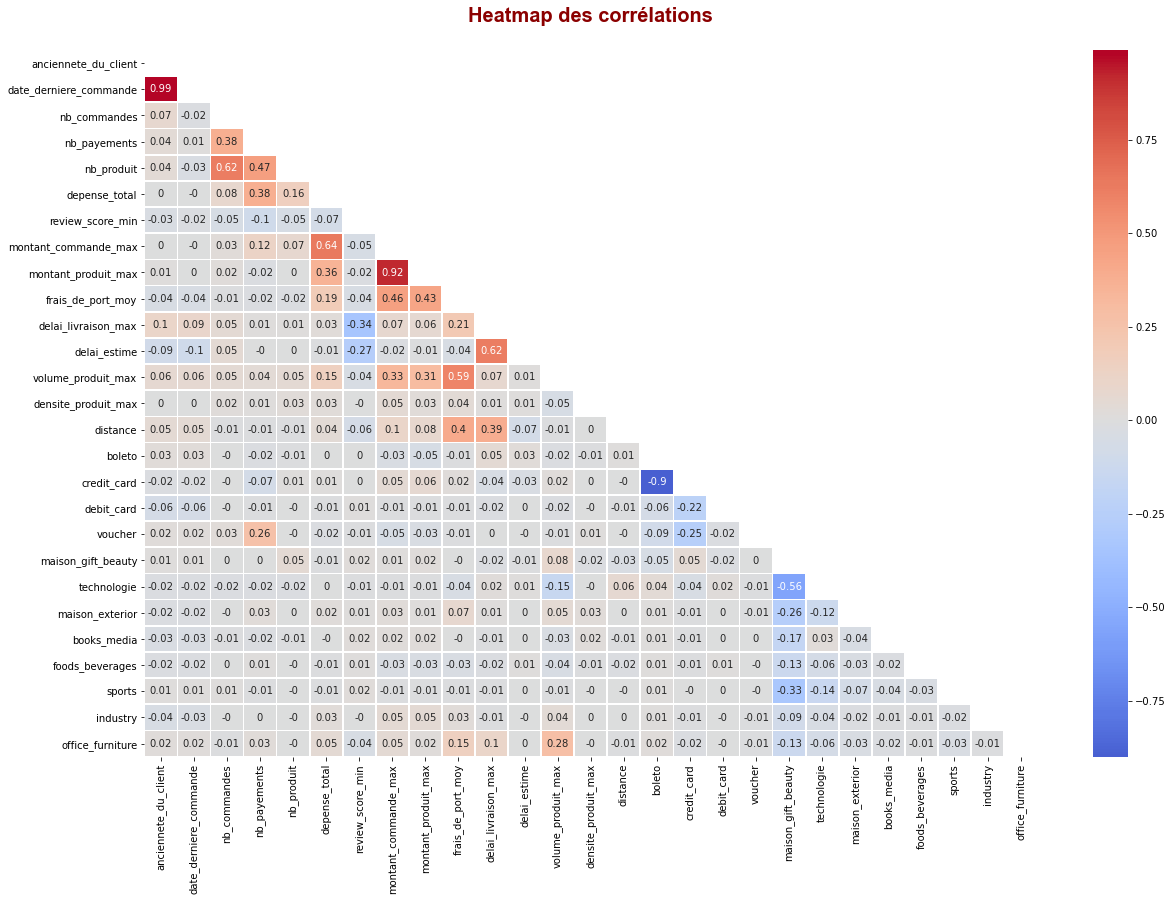

In [107]:
plt.subplots(figsize=(20, 13))
matrix = np.triu(data_clean.corr())

ax = sns.heatmap(data_clean.corr().round(2),
                 annot=True,
                 mask=matrix,
                 cmap='coolwarm',
                 center=0,
                 linewidths=.7)
ax.set_title(f'Heatmap des corrélations\n', fontdict=font)
plt.show()

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119145 entries, 0 to 119144
Data columns (total 65 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119145 non-null  object        
 1   customer_unique_id             119145 non-null  object        
 2   customer_city                  119145 non-null  object        
 3   customer_state                 119145 non-null  object        
 4   customer_lat                   118823 non-null  float64       
 5   customer_lng                   118823 non-null  float64       
 6   order_id                       119145 non-null  object        
 7   order_status                   119145 non-null  object        
 8   order_purchase_timestamp       119145 non-null  datetime64[ns]
 9   order_delivered_customer_date  115727 non-null  datetime64[ns]
 10  order_estimated_delivery_date  119145 non-null  datetime64[ns]
 11  

In [109]:
data_clean.to_csv('data/olist_data_clean.csv', index=False)